# Data Cleaning and Preprocessing

In [2]:
import pandas as pd

raw_data = pd.read_csv('Dataset/kirana.csv')

raw_data.info()

raw_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tx_id               5000 non-null   object 
 1   store_type          5000 non-null   object 
 2   timestamp           5000 non-null   object 
 3   total_amount        5000 non-null   float64
 4   payment_method      5000 non-null   object 
 5   tendered_amount     3254 non-null   float64
 6   tendered_breakdown  3254 non-null   object 
 7   change_given        5000 non-null   float64
 8   change_breakdown    2364 non-null   object 
 9   notes               1746 non-null   object 
dtypes: float64(3), object(7)
memory usage: 390.8+ KB


,tx_id,store_type,timestamp,total_amount,payment_method,tendered_amount,tendered_breakdown,change_given,change_breakdown,notes
0,65b44d64-5ad6-4b41-885d-8f8dd7d4aafb,kirana,2025-10-10 19:59:12,212.30,cash,300.00,"{""200"":1,""100"":1}",87.70,"{""50"":1,""20"":1,""10"":1,""5"":1,""2"":1}",NaN
1,b9a21eca-f23d-4e63-ab79-cd63e325df61,kirana,2025-11-04 17:33:47,30.43,cash,30.43,"{""20"":1,""10"":1}",0.00,NaN,NaN
2,1851b952-0d13-44c8-98a3-22e1e2b43d27,kirana,2025-08-27 19:01:29,16.26,upi,NaN,NaN,0.00,NaN,upi_txn=e3ae27c1-8d0
3,8718a7a6-12a7-4234-aae0-53152c988f2b,kirana,2025-11-14 07:42:55,18.31,cash,20.00,"{""20"":1}",1.69,"{""1"":1}",NaN
4,a65b6460-4ede-473f-8887-ff6e5ec04c38,kirana,2025-10-30 18:33:38,67.10,upi,NaN,NaN,0.00,NaN,upi_txn=e90e6418-a5a
5,791c9a49-af37-4c23-b4b7-2b6e1ba0ad89,kirana,2025-08-23 18:47:51,72.42,upi,NaN,NaN,0.00,NaN,upi_txn=1762295b-671
6,da24f0e3-2378-4cb0-84d4-36937d7cd574,kirana,2025-09-19 07:10:19,267.09,upi,NaN,NaN,0.00,NaN,upi_txn=8fee5303-840
7,ac7f3695-671e-4e6c-aee7-d42266e91300,kirana,2025-09-06 11:34:21,84.72,cash,84.72,"{""50"":1,""20"":1,""10"":1,""2"":2}",0.00,NaN,NaN
8,e65a85a7-c2e1-4893-9730-f5888d1c0b62,kirana,2025-10-13 07:49:45,110.55,upi,NaN,NaN,0.00,NaN,upi_txn=7d7cecaa-60c
9,8c094c24-2595-4396-ad67-c2db451097fe,kirana,2025-09-02 07:40:31,84.81,cash,100.00,"{""100"":1}",15.19,"{""10"":1,""5"":1}",NaN


In [11]:
raw_data.fillna(value=0, inplace=True)

raw_data.head(10)

## We need only the timestamp,change given and payment method columns for our analysis. First let us drop the unnecessary columns and filter the payment method
raw_data = raw_data[raw_data['payment_method'] == 'cash']

raw_data.head()

filterd_data = raw_data[['timestamp', 'change_given','payment_method']]

# We need to covert the timestamp column to datetime format for better analysis
filterd_data['Date'] = pd.to_datetime(filterd_data['timestamp']).dt.date
filterd_data['Day']= pd.to_datetime(filterd_data['timestamp']).dt.day_name()
filterd_data.tail()

cleaned_data = filterd_data.groupby(['Date','Day'])['change_given'].sum().reset_index()


cleaned_data.tail()


cleaned_data.to_csv('Cleaned/cleaned_data.csv', index=False)

C:\Users\adhis\AppData\Local\Temp\ipykernel_20532\966140975.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filterd_data['Date'] = pd.to_datetime(filterd_data['timestamp']).dt.date
C:\Users\adhis\AppData\Local\Temp\ipykernel_20532\966140975.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filterd_data['Day']= pd.to_datetime(filterd_data['timestamp']).dt.day_name()


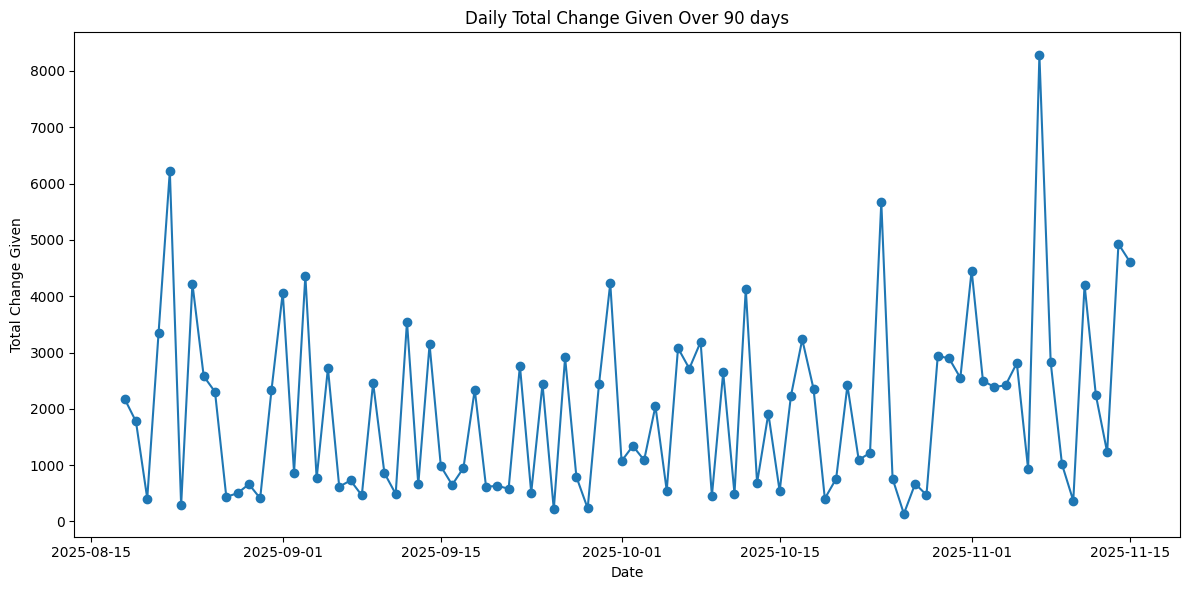

In [13]:
# Let us visualize the cleaned data

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.plot(cleaned_data['Date'], cleaned_data['change_given'], marker='o')

plt.xlabel('Date')
plt.ylabel('Total Change Given')
plt.title('Daily Total Change Given Over 90 days')
plt.tight_layout()
plt.show()


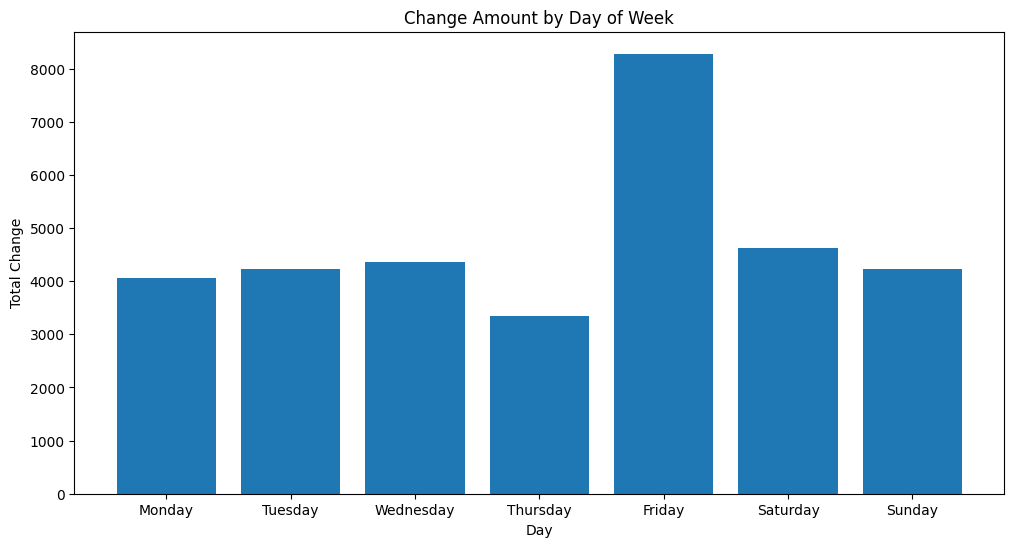

In [14]:
plt.figure(figsize=(12,6))
plt.bar(cleaned_data["Day"], cleaned_data["change_given"])

plt.xlabel("Day")
plt.ylabel("Total Change")
plt.title("Change Amount by Day of Week")
plt.show()

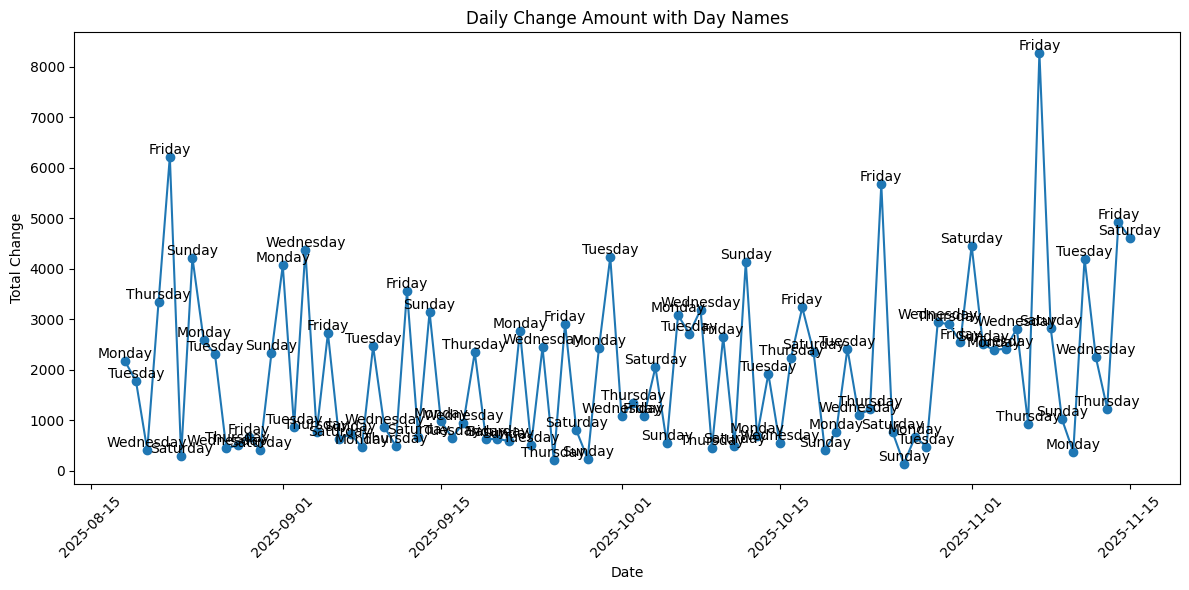

In [16]:
plt.figure(figsize=(12,6))
plt.plot(cleaned_data["Date"], cleaned_data["change_given"], marker="o")

for i in range(len(cleaned_data)):
    plt.text(cleaned_data["Date"][i],
             cleaned_data["change_given"][i],
             cleaned_data["Day"][i],
             ha='center', va='bottom')

plt.xlabel("Date")
plt.ylabel("Total Change")
plt.title("Daily Change Amount with Day Names")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# TESTING FOR STATIONARITY 

In [52]:
from statsmodels.tsa.stattools import adfuller

test_result = adfuller(cleaned_data['change_given'])


#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


adfuller_test(cleaned_data['change_given'])

ADF Test Statistic : -9.91729881803565
p-value : 3.0559387803685327e-17
#Lags Used : 0
Number of Observations Used : 89
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


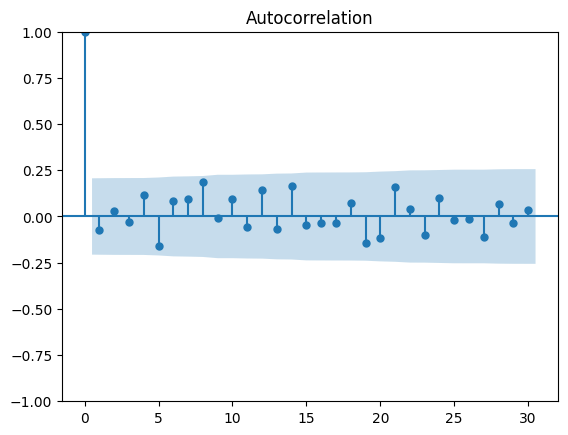

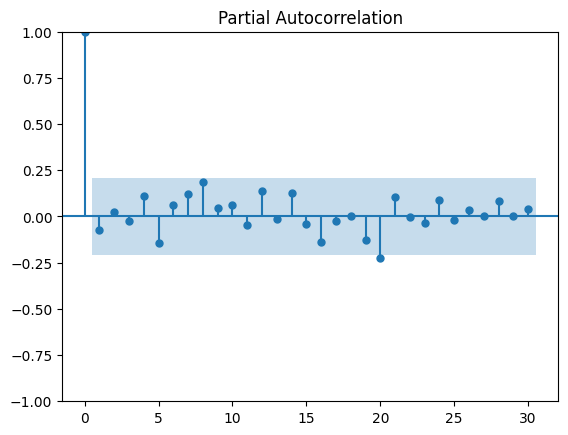

In [53]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plot_acf(cleaned_data['change_given'], lags=30)
plt.show()

plot_pacf(cleaned_data['change_given'], lags=30)
plt.show()

# Model Training

In [43]:

from sklearn.preprocessing import OneHotEncoder
from statsmodels.tsa.statespace.sarimax import SARIMAX


data = pd.read_csv('Cleaned/cleaned_data.csv')

data.info()

data['Date'] = pd.to_datetime(data['Date'])

data.drop(columns=['Day'], inplace=True)
data.info()



#Setting date as index
data = data.set_index('Date')
data = data.asfreq("D")
data['change_given'] = data['change_given'].fillna(method='ffill')


data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          90 non-null     object 
 1   Day           90 non-null     object 
 2   change_given  90 non-null     float64
dtypes: float64(1), object(2)
memory usage: 2.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          90 non-null     datetime64[ns]
 1   change_given  90 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.5 KB


C:\Users\adhis\AppData\Local\Temp\ipykernel_20532\1222824745.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['change_given'] = data['change_given'].fillna(method='ffill')


,change_given
Date,
2025-08-18,2177.12
2025-08-19,1775.37
2025-08-20,407.79
2025-08-21,3338.79
2025-08-22,6221.77


In [44]:
print(data.index.freq)

pd.infer_freq(data.index)

<Day>


'D'

In [ ]:

split = int(len(data) * 0.8)
train = data.iloc[:split]
test = data.iloc[split:]

model = SARIMAX(train['change_given'], order=(1,1,1), seasonal_order=(1,1,1,7))

model_fit = model.fit()

predictions = model_fit.forecast(len(test))

In [47]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np


mae = mean_absolute_error(test,predictions)
rsme = np.sqrt(mean_squared_error(test,predictions))

print("SARIMA MAE:", mae)
print("SARIMA RMSE:", rsme)

SARIMA MAE: 1652.4735611507303
SARIMA RMSE: 2196.628205890886


In [ ]:
# Using AutoARIMA for better parameter tuning

from pmdarima import auto_arima

train_log = np.log1p(train["change_given"])
test_log = np.log1p(test["change_given"])

auto_model = auto_arima(
    train['change_given'], 
    seasonal=True, 
    suppress_warnings=True,
    m=7,
    trace=True,
    error_action='ignore')


order = auto_model.order
seasonal_order = auto_model.seasonal_order

print("Best order:", order)
print("Best seasonal order:",seasonal_order)


model = SARIMAX(train_log,order=order,seasonal_order=seasonal_order)

model_fit = model.fit()

pred_log = model_fit.forecast(len(test))

predictions = np.expm1(pred_log)

mae = mean_absolute_error(test["change_given"], predictions)
rmse = np.sqrt(mean_squared_error(test["change_given"], predictions))

print("Improved MAE:", mae)
print("Improved RMSE:", rmse)



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=1250.890, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=1252.463, Time=0.07 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=1252.522, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=1315.652, Time=0.00 sec
 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=1252.817, Time=0.03 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=1252.680, Time=0.02 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=1254.678, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=1250.500, Time=0.01 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=1252.419, Time=0.03 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=1254.418, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[7] intercept   : AIC=1252.421, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=1252.383, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=1250.658, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[7] intercept   : 